TASK: Visualize the weekly returns of the S&P 500 index from the past 20 years on a chart.

In [61]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


SET START DATE

In [62]:
# Start Date
from pandas.core.arrays import period

st_date = (pd.Timestamp.today() - pd.DateOffset(years = 10)).strftime("%Y-%m-%d")

#print(st_date)


GET THE TICKER DATA

In [63]:
ticker = yf.Ticker("^GSPC") # tickername of s&p 500;

df = yf.download(tickers = "^GSPC",start=st_date,end=pd.Timestamp.today()).dropna()

#print(df.head())


/var/folders/w6/y3_lv4l950xb6cmsr6mnq5l80000gn/T/ipykernel_47517/379465488.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers = "^GSPC",start=st_date,end=pd.Timestamp.today()).dropna()
[*********************100%***********************]  1 of 1 completed


In [64]:
weekly = df["Close"].resample("W-FRI").last().pct_change().dropna()
weekly = weekly.squeeze()

weekly_returns = pd.DataFrame({"Week":weekly.index,"Return(%)":weekly.values * 100})
#print(weekly_returns)

Creating the figure


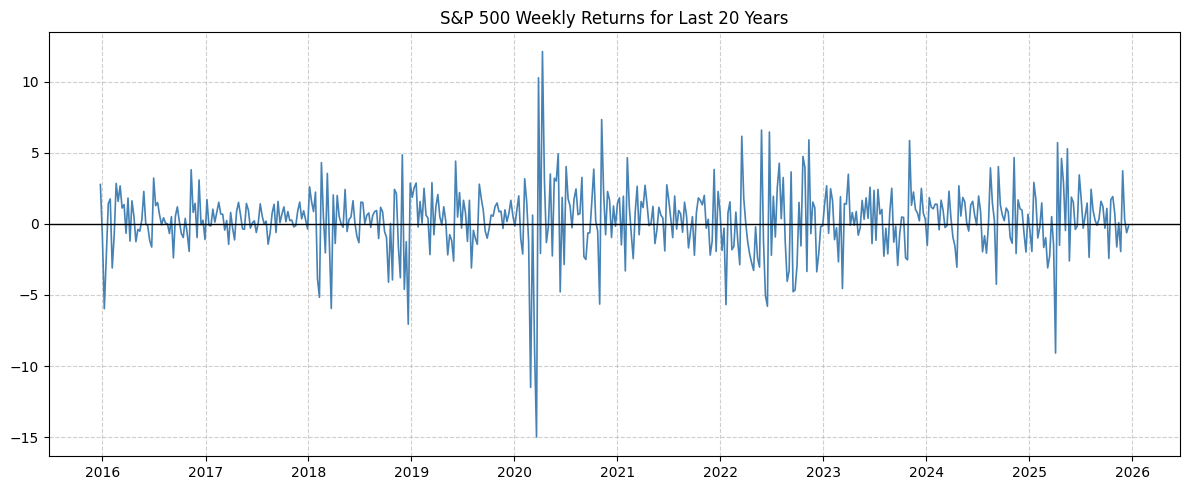

In [89]:
plt.figure(figsize=(12,5))

plt.plot(weekly_returns["Week"],weekly_returns["Return(%)"],color = "steelblue",linewidth = 1.2)
plt.axhline(0,color = "black", linewidth =1) 
plt.title("S&P 500 Weekly Returns for Last 20 Years")
plt.grid(True,which = 'both',axis='both',alpha = 0.6,linestyle = "--")
plt.tight_layout()
plt.show()


